In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


<Axes: xlabel='count', ylabel='Category'>

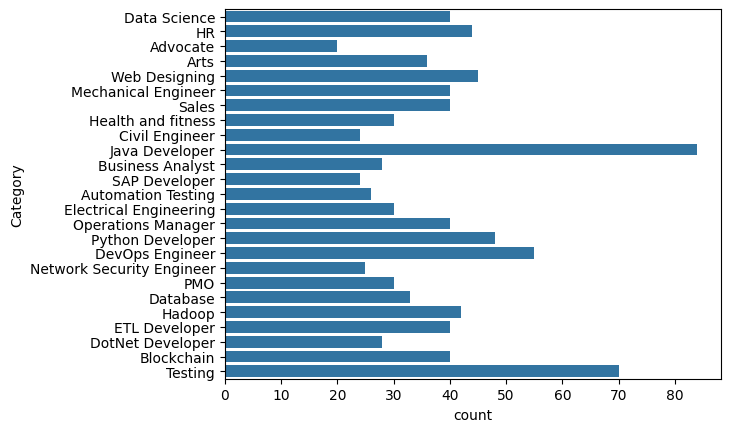

In [ ]:
sns.countplot(df['Category'])

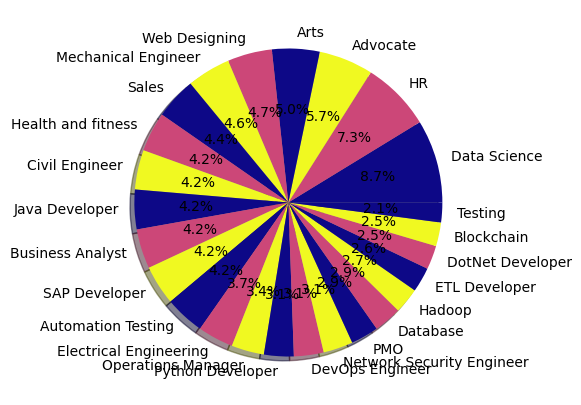

In [ ]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,5))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [ ]:
df['Resume'][76]

'Education Details \r\nJune 2012 to May 2015 B.A Economics Chennai, Tamil Nadu Sdnbvc\r\nHr \r\n\r\n\r\nSkill Details \r\nCompany Details \r\ncompany - Anything IT Solution\r\ndescription - Hr'

In [ ]:
import re
def cleanResume(txt):
  cleanTxt= re.sub('http\S+\s',' ',txt)
  cleanTxt= re.sub('RT|cc',' ',cleanTxt)
  cleanTxt= re.sub('@\S+',' ',cleanTxt)
  cleanTxt= re.sub('#\S+',' ',cleanTxt)
  cleanTxt= re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanTxt)
  cleanTxt= re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
  cleanTxt= re.sub('\s+',' ',cleanTxt)
  return cleanTxt

In [ ]:
cleanResume("my ##### $ # #harshita website link is this http://helloworld and access it @gmail.com")

'my website link is this and a ess it '

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [ ]:
df['Resume'][2]

'Areas of Interest Deep Learning Control System Design Programming in Python Electric Machinery Web Development Analytics Technical Activities q Hindustan Aeronautics Limited Bangalore For 4 weeks under the guidance of Mr Satish Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python WebFrameWork Django Flask LTSPICE intermediate Languages and and MIPOWER intermediate Github GitBash Jupyter Notebook Xampp MySQL Basics Python Software Packages Interpreters Anaconda Python2 Python3 Pycharm Java IDE Eclipse Operating Systems Windows Ubuntu Debian Kali Linux Education Details January 2019 B Tech Electrical and Electronics Engineering Manipal Institute of Technology January 2015 DEEKSHA CENTER January 2013 Little Flower Public School August 2000 Manipal Academy of Higher DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHUSIAST Skill Details Data Analysis Exprience Less than 1 year months excel Exprience Less than 1 year mon

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
le.fit(df['Category'])
df['Category'] =  le.transform(df['Category'])

In [ ]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [ ]:
requiredText

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state= 42)

In [ ]:
X_train.shape
# 80% data in  train

(769, 7351)

In [ ]:
X_test.shape
# 20% data in test

(193, 7351)

**train the model and print the classification report:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9844559585492227


In [ ]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

Prediction System

In [ ]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [ ]:
myresume = """Areas of Interest Deep Learning Control System Design Programming in Python Electric Machinery Web Development Analytics Technical Activities q Hindustan Aeronautics Limited Bangalore For 4 weeks under the guidance of Mr Satish Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab Python and Java LabView Python WebFrameWork Django Flask LTSPICE intermediate Languages and and MIPOWER intermediate Github GitBash Jupyter Notebook Xampp MySQL Basics Python Software Packages Interpreters Anaconda Python2 Python3 Pycharm Java IDE Eclipse Operating Systems Windows Ubuntu Debian Kali Linux Education Details January 2019 B Tech Electrical and Electronics Engineering Manipal Institute of Technology January 2015 DEEKSHA CENTER January 2013 Little Flower Public School August 2000 Manipal Academy of Higher DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHUSIAST Skill Details Data Analysis Exprience Less than 1 year months excel Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months mathematics Exprience Less than 1 year months Python Exprience Less than 1 year months Matlab Exprience Less than 1 year months Electrical Engineering Exprience Less than 1 year months Sql Exprience Less than 1 year monthsCompany Details company THEMATHCOMPANY description I am currently working with a Casino based operator name not to be disclosed in Macau I need to segment the customers who visit their property based on the value the patrons bring into the company Basically prove that the segmentation can be done in much better way than the current system which they have with proper numbers to back it up Henceforth they can implement target marketing strategy to attract their customers who add value to the business"""

In [ ]:
import pickle

# load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# clean the input resume
cleaned_resume = cleanResume(myresume)

# transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# make a prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# map category ID to category name
category_mapping = {
            15: "Java Developer",
            23: "Testing",
            8: "DevOps Engineer",
            20: "Python Developer",
            24: "Web Designing",
            12: "HR",
            13: "Hadoop",
            3: "Blockchain",
            10: "ETL Developer",
            18: "Operations Manager",
            6: "Data Science",
            22: "Sales",
            16: "Mechanical Engineer",
            1: "Arts",
            7: "Database",
            11: "Electrical Engineering",
            14: "Health and fitness",
            19: "PMO",
            4: "Business Analyst",
            9: "DotNet Developer",
            2: "Automation Testing",
            17: "Network Security Engineer",
            21: "SAP Developer",
            5: "Civil Engineer",
            0: "Advocate",
} # dictionary


category_name = category_mapping.get(prediction_id, "unknown")

print("Prediction Category:", category_name)
print(prediction_id)


Prediction Category: Data Science
6
